In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# from google.colab import files

# uploaded = files.upload()

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# import nltk
# nltk.download('vader_lexicon', download_dir='/content/drive/MyDrive/nltk_data')

# import os
# nltk.data.path.append('/content/drive/MyDrive/nltk_data')

In [4]:
# Read in data

df = pd.read_csv('/content/Reviews.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
df.shape

(568454, 10)

In [8]:
df = df.head(500)
df.shape

(500, 10)

# **EDA**

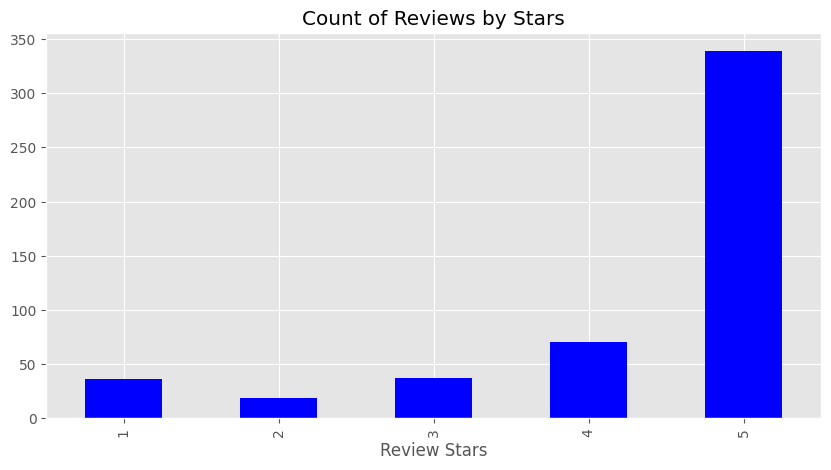

In [9]:
quick = df['Score'].value_counts().sort_index() \
    .plot(kind = 'bar',
         title = 'Count of Reviews by Stars',
         figsize = (10, 5),
         color = 'b'
         )
quick.set_xlabel('Review Stars')
plt.show()

# **Basic NLTK**

In [10]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [14]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

# **1. VADER Sentiment Soring**

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
sia.polarity_scores("This oatmeal is bad. Its mushy, soft, I hate it. Quaker Oats is the way to go.")

{'neg': 0.34, 'neu': 0.66, 'pos': 0.0, 'compound': -0.802}

In [21]:
# Run the polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
# Creating a df with info from original df and vader scores

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [23]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Plot VADER Results**

In [24]:
vaders.groupby('Score')['compound'].mean()

,compound
Score,
1,-0.127569
2,0.198178
3,0.431411
4,0.655927
5,0.762773


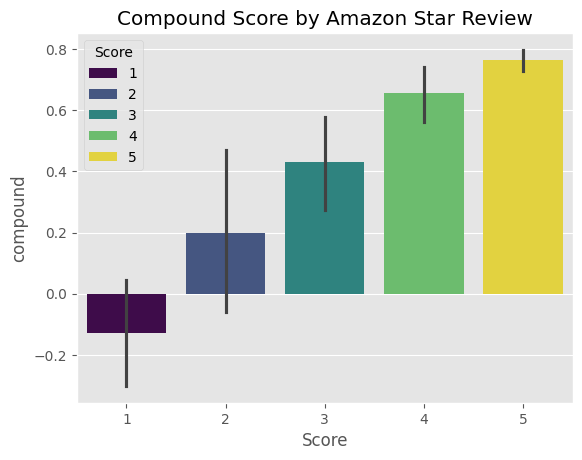

In [25]:
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis', hue='Score')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

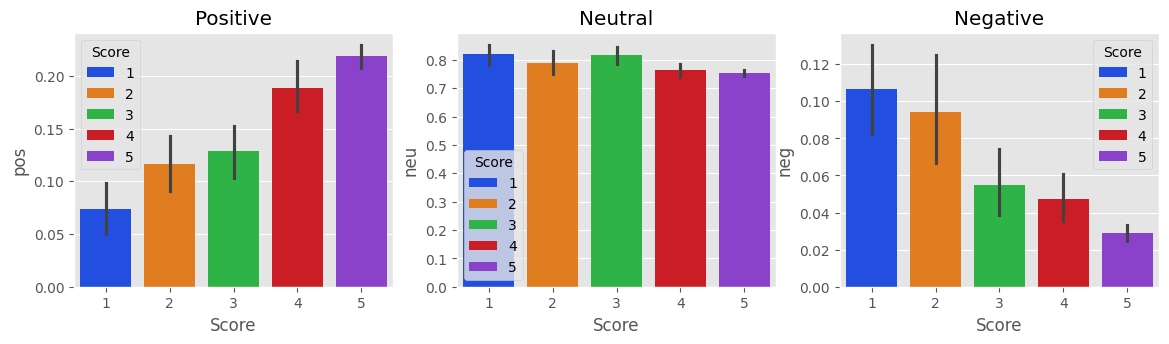

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3.3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette='bright', hue='Score')
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette='bright', hue='Score')
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette='bright', hue='Score')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
#plt.tight_layout()
plt.show()

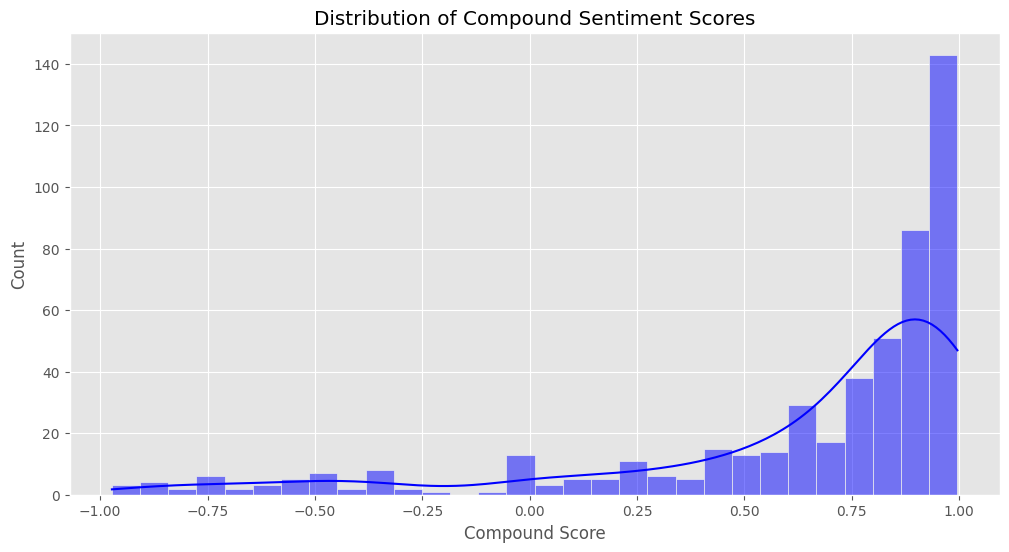

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(vaders['compound'], bins=30, kde=True, color='blue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.show()


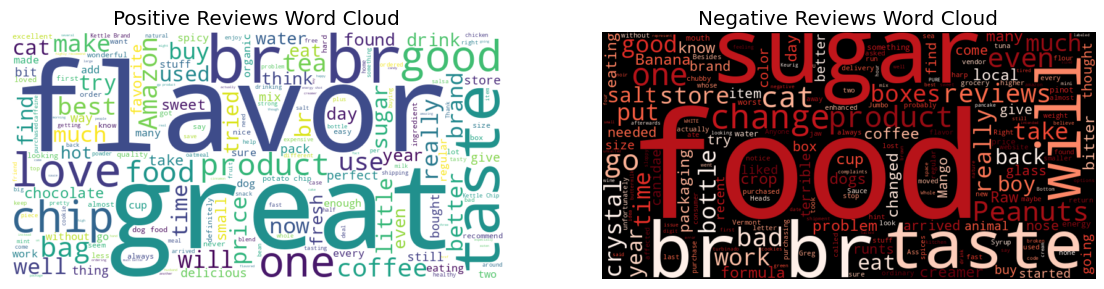

In [28]:
from wordcloud import WordCloud

# Positive Word Cloud
positive_text = " ".join(vaders[vaders['compound'] > 0.5]['Text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Negative Word Cloud
negative_text = " ".join(vaders[vaders['compound'] < -0.5]['Text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].set_title('Positive Reviews Word Cloud')
axs[0].axis('off')

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].set_title('Negative Reviews Word Cloud')
axs[1].axis('off')

plt.show()


# **2. RoBERTa Pre-trained Model**

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model =AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [31]:
# VADER result on example

print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [32]:
# Roberta Model result on example

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

# Format scores to 2 decimal places and convert to regular float
scores_dict = {
    'roberta_neg': round(float(scores[0]), 2),
    'roberta_neu': round(float(scores[1]), 2),
    'roberta_pos': round(float(scores[2]), 2)
}
print(scores_dict)

{'roberta_neg': 0.98, 'roberta_neu': 0.02, 'roberta_pos': 0.0}


In [33]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta_neg': round(float(scores[0]), 2),
        'roberta_neu': round(float(scores[1]), 2),
        'roberta_pos': round(float(scores[2]), 2)
    }

    return scores_dict

polarity_scores_roberta('I am so happy')

{'roberta_neg': 0.0, 'roberta_neu': 0.01, 'roberta_pos': 0.99}

In [34]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)

        both = {**vader_result_rename, **roberta_result}

        res[myid] = both

    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [35]:
df.iloc[186]

,186
Id,187
ProductId,B000NY8ODS
UserId,A1IU7S4HCK1XK0
ProfileName,Joanna Daneman
HelpfulnessNumerator,2
HelpfulnessDenominator,2
Score,5
Time,1333843200
Summary,"Make a fresh fruit tart, light and beautiful"
Text,This packet of glaze is the secret to making t...


In [36]:
df['Text'].values[186]

'This packet of glaze is the secret to making those European style fresh fruit tarts. I am about to make one for a pie auction at church, after a friend requested that something "strawberry" should be offered. You can make the most amazing and relatively "healthy" fruit tarts by baking a base, layering it with uncooked, fresh, sliced fruit, then pouring over the made-up contents of one of these packets. They harden up at room temperature, hold the fruit together so you can slice the tart, and they let the beauty of the arranged fruit show through. I\'ve also seen this glaze used over cheesecakes, to hold a fruit topping in place. Personally, I do not like cheesecake (too rich for me) but a fruit glazed cheesecake is gorgeous, I will admit. To do this, slice fruit and layer it on the cheesecake while it\'s still in the springform pan. Pour on the glaze, let it set up and then remove the springform. You\'ll have a clear layer of fruit on top of the cheesecake. Cherries, strawberries or s

In [37]:
# Creating a df with info from original df and vader and roberta scores

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [38]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.01,0.05,0.94,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.51,0.45,0.04,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.00,0.10,0.90,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.00,0.09,0.91,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.00,0.01,0.99,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **Plot RoBERTa Results**

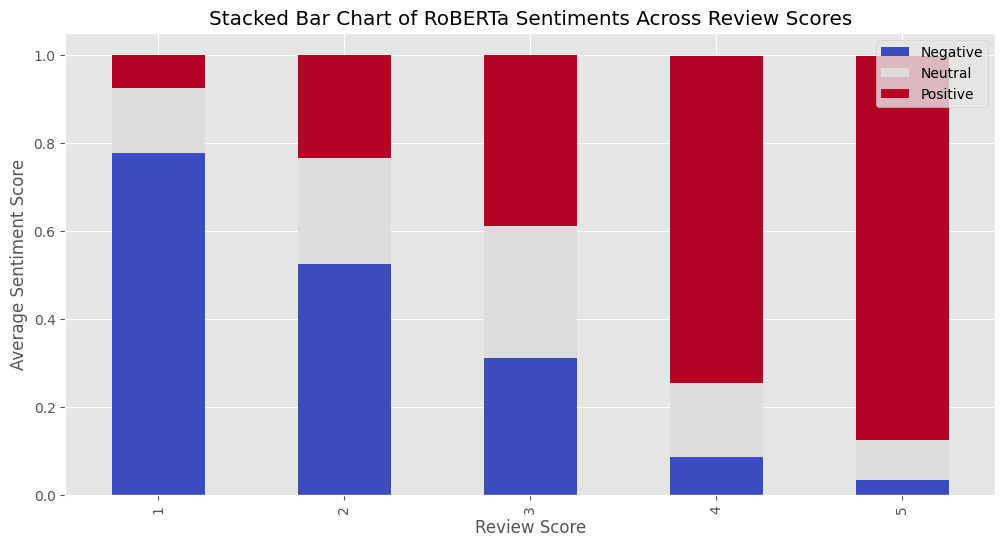

In [39]:
sentiment_means = results_df.groupby('Score')[['roberta_neg', 'roberta_neu', 'roberta_pos']].mean()

sentiment_means.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Stacked Bar Chart of RoBERTa Sentiments Across Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Average Sentiment Score')
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.show()


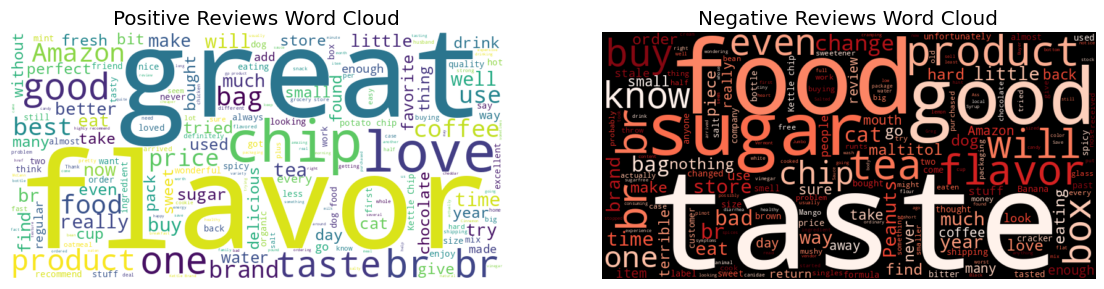

In [40]:
from wordcloud import WordCloud

# Positive
positive_text = " ".join(results_df[results_df['roberta_pos'] > 0.5]['Text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Negative
negative_text = " ".join(results_df[results_df['roberta_neg'] > 0.5]['Text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].imshow(wordcloud_pos, interpolation='bilinear')
axs[0].set_title('Positive Reviews Word Cloud')
axs[0].axis('off')

axs[1].imshow(wordcloud_neg, interpolation='bilinear')
axs[1].set_title('Negative Reviews Word Cloud')
axs[1].axis('off')

plt.show()

# **Combine and Compare**

In [41]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

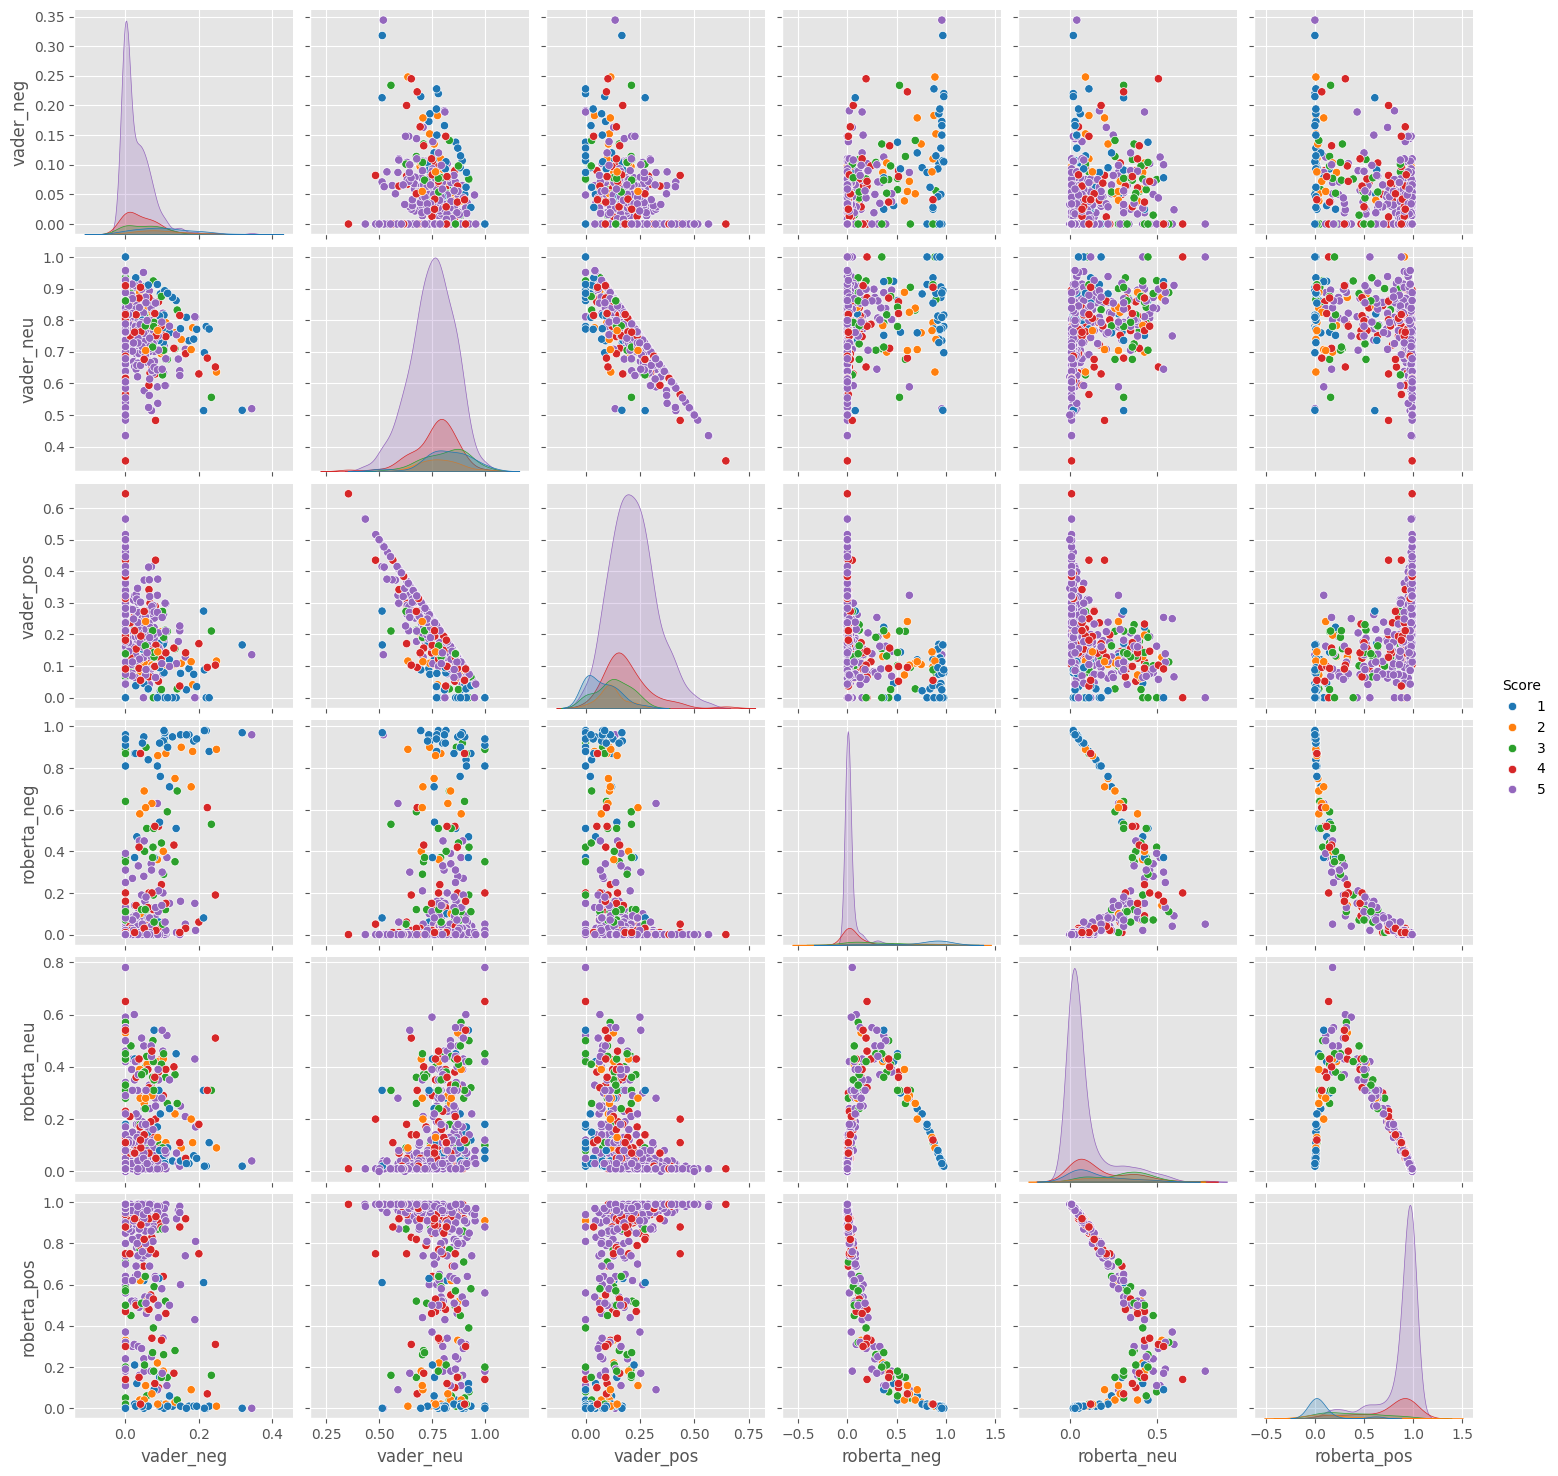

In [42]:
sns.pairplot(data=results_df,
           vars=['vader_neg', 'vader_neu', 'vader_pos',
                'roberta_neg', 'roberta_neu', 'roberta_pos'],
            palette='tab10',
            hue='Score'
           )

plt.show()

# **3. ALBERT Model**

In [43]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      498 non-null    int64  
 1   vader_neg               498 non-null    float64
 2   vader_neu               498 non-null    float64
 3   vader_pos               498 non-null    float64
 4   vader_compound          498 non-null    float64
 5   roberta_neg             498 non-null    float64
 6   roberta_neu             498 non-null    float64
 7   roberta_pos             498 non-null    float64
 8   ProductId               498 non-null    object 
 9   UserId                  498 non-null    object 
 10  ProfileName             498 non-null    object 
 11  HelpfulnessNumerator    498 non-null    int64  
 12  HelpfulnessDenominator  498 non-null    int64  
 13  Score                   498 non-null    int64  
 14  Time                    498 non-null    in

In [44]:
# Load ALBERT Sentiment Model
ALBERT_MODEL = "textattack/albert-base-v2-imdb"
albert_tokenizer = AutoTokenizer.from_pretrained(ALBERT_MODEL)
albert_model = AutoModelForSequenceClassification.from_pretrained(ALBERT_MODEL)

In [45]:
# # Function for ALBERT Sentiment Analysis
# def polarity_scores_albert(text):
#     encoded_text = albert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)
#     output = albert_model(**encoded_text)

#     scores = output.logits.detach().numpy()[0]
#     scores = softmax(scores)  # Normalize to probabilities

#     return {
#         'albert_neg': round(float(scores[0]), 2),
#         'albert_pos': round(float(scores[1]), 2)  # ALBERT typically provides 2 classes (negative, positive)
#     }

In [46]:
# Function for ALBERT Sentiment Analysis

def polarity_scores_albert(text, neutral_threshold=0.05):
    """
    Computes sentiment scores for text using ALBERT, adding a neutral category.

    Parameters:
    - text (str): The input text to analyze.
    - neutral_threshold (float): Threshold to classify sentiment as neutral.

    Returns:
    - dict: {'albert_neg': negative score, 'albert_neu': neutral score, 'albert_pos': positive score}
    """
    # Tokenize and encode text
    encoded_text = albert_tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Get ALBERT model output
    output = albert_model(**encoded_text)

    # Convert logits to probabilities using softmax
    scores = softmax(output.logits.detach().numpy()[0])

    # Extract positive and negative scores
    albert_neg = float(scores[0])
    albert_pos = float(scores[1])

    # Introduce a neutral category when scores are close
    if abs(albert_neg - albert_pos) < neutral_threshold:
        albert_neu = (albert_neg + albert_pos) / 2  # Assign equal proportion
        albert_neg = albert_pos = albert_neu / 2  # Reduce extreme values
    else:
        albert_neu = 0  # No neutral component

    # Round values to 2 decimal places
    return {
        "albert_neg": round(albert_neg, 2),
        "albert_neu": round(albert_neu, 2),
        "albert_pos": round(albert_pos, 2),
    }


In [47]:
# Example Usage
example_text = "I am so happy."
albert_result = polarity_scores_albert(example_text)
print(albert_result)

{'albert_neg': 0.03, 'albert_neu': 0, 'albert_pos': 0.97}


In [48]:
polarity_scores_albert(example)

{'albert_neg': 1.0, 'albert_neu': 0, 'albert_pos': 0.0}

In [49]:
# albert_result = polarity_scores_albert(text)  # Add ALBERT sentiment analysis
# all_sentiments = {**vader_result_rename, **roberta_result, **albert_result}  # Include ALBERT
# res[myid] = all_sentiments  # Store results

In [50]:
# # Convert `res` to a DataFrame and merge with `df`
# results_df = pd.DataFrame(res).T
# results_df = results_df.reset_index().rename(columns={'index': 'Id'})
# results_df = results_df.merge(df, how='left')

In [51]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']

        # VADER Sentiment Analysis
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}

        # RoBERTa Sentiment Analysis
        roberta_result = polarity_scores_roberta(text)

        # ALBERT Sentiment Analysis
        albert_result = polarity_scores_albert(text)

        # Combine all results
        all_sentiments = {**vader_result_rename, **roberta_result, **albert_result}
        res[myid] = all_sentiments

    except RuntimeError:
        print(f"Broke for id {myid}")

# ✅ Convert results dictionary into a DataFrame
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# ✅ Merge with original DataFrame to keep additional columns
results_df = results_df.merge(df, how='left')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [52]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'albert_neg', 'albert_neu',
       'albert_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

In [53]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      498 non-null    int64  
 1   vader_neg               498 non-null    float64
 2   vader_neu               498 non-null    float64
 3   vader_pos               498 non-null    float64
 4   vader_compound          498 non-null    float64
 5   roberta_neg             498 non-null    float64
 6   roberta_neu             498 non-null    float64
 7   roberta_pos             498 non-null    float64
 8   albert_neg              498 non-null    float64
 9   albert_neu              498 non-null    float64
 10  albert_pos              498 non-null    float64
 11  ProductId               498 non-null    object 
 12  UserId                  498 non-null    object 
 13  ProfileName             498 non-null    object 
 14  HelpfulnessNumerator    498 non-null    in

In [54]:
# ✅ Display the first few rows to verify the structure
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,albert_neg,albert_neu,albert_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.01,0.05,0.94,0.02,0.0,0.98,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.51,0.45,0.04,0.88,0.0,0.12,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.00,0.10,0.90,0.01,0.0,0.99,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.00,0.09,0.91,0.04,0.0,0.96,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.00,0.01,0.99,0.01,0.0,0.99,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# **The Transformers Pipeline**

In [55]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [56]:
import tf_keras as keras

In [57]:
sent_pipeline('I am so happy')

[{'label': 'POSITIVE', 'score': 0.9998812675476074}]

In [58]:
sent_pipeline('This is a bad product')

[{'label': 'NEGATIVE', 'score': 0.9998045563697815}]

# **Performance Metrics**

In [59]:
#1️⃣ Convert Scores to Sentiment Labels

def map_score_to_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

# Create 'true_sentiment' column
results_df['true_sentiment'] = results_df['Score'].apply(map_score_to_sentiment)

# ***VADER***

In [60]:
def vader_label(compound_score):
    if compound_score >= 0.05:
        return 1  # Positive
    elif compound_score <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

# Apply function to create `vader_pred_sentiment`
results_df['vader_pred_sentiment'] = results_df['vader_compound'].apply(vader_label)

In [61]:
# 2️⃣ Calculate Performance Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True sentiment labels
y_true = results_df['true_sentiment']

# VADER predicted labels
y_pred_vader = results_df['vader_pred_sentiment']

# Accuracy, Precision, Recall, F1-score
vader_accuracy = accuracy_score(y_true, y_pred_vader)
vader_precision = precision_score(y_true, y_pred_vader, average='weighted')
vader_recall = recall_score(y_true, y_pred_vader, average='weighted')
vader_f1 = f1_score(y_true, y_pred_vader, average='weighted')

# Print results
print(f"🔹 VADER Accuracy: {vader_accuracy:.2f}")
print(f"🔹 VADER Precision: {vader_precision:.2f}")
print(f"🔹 VADER Recall: {vader_recall:.2f}")
print(f"🔹 VADER F1-Score: {vader_f1:.2f}")

🔹 VADER Accuracy: 0.83
🔹 VADER Precision: 0.80
🔹 VADER Recall: 0.83
🔹 VADER F1-Score: 0.81


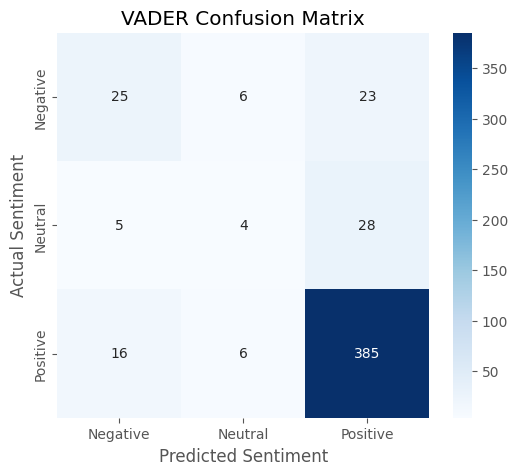

In [62]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
vader_conf_matrix = confusion_matrix(y_true, y_pred_vader)

# Define labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(vader_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("VADER Confusion Matrix")
plt.show()

# ***RoBERTa***

In [63]:
#1️⃣ Convert RoBERTa Scores to Sentiment Labels

def roberta_label(row):
    """Assigns a sentiment label based on RoBERTa's predicted scores."""
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])

    if max_score == row['roberta_pos']:
        return 1  # Positive
    elif max_score == row['roberta_neu']:
        return 0  # Neutral
    else:
        return -1  # Negative

# Apply function to create `roberta_pred_sentiment`
results_df['roberta_pred_sentiment'] = results_df.apply(roberta_label, axis=1)


In [64]:
#2️⃣ Calculate RoBERTa Performance Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True sentiment labels
y_true = results_df['true_sentiment']

# RoBERTa predicted labels
y_pred_roberta = results_df['roberta_pred_sentiment']

# Accuracy, Precision, Recall, F1-score
roberta_accuracy = accuracy_score(y_true, y_pred_roberta)
roberta_precision = precision_score(y_true, y_pred_roberta, average='weighted')
roberta_recall = recall_score(y_true, y_pred_roberta, average='weighted')
roberta_f1 = f1_score(y_true, y_pred_roberta, average='weighted')

# Print results
print(f"🔹 RoBERTa Accuracy: {roberta_accuracy:.2f}")
print(f"🔹 RoBERTa Precision: {roberta_precision:.2f}")
print(f"🔹 RoBERTa Recall: {roberta_recall:.2f}")
print(f"🔹 RoBERTa F1-Score: {roberta_f1:.2f}")


🔹 RoBERTa Accuracy: 0.86
🔹 RoBERTa Precision: 0.86
🔹 RoBERTa Recall: 0.86
🔹 RoBERTa F1-Score: 0.86


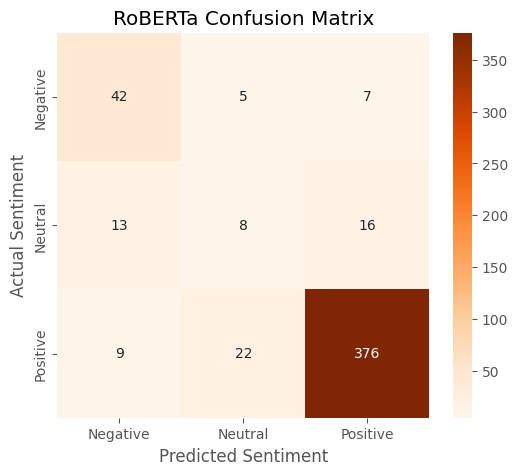

In [65]:
#3️⃣ Confusion Matrix for RoBERTa

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
roberta_conf_matrix = confusion_matrix(y_true, y_pred_roberta)

# Define labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(roberta_conf_matrix, annot=True, fmt="d", cmap="Oranges", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("RoBERTa Confusion Matrix")
plt.show()


# ***ALBERT***

In [66]:
#1️⃣ Convert ALBERT Scores to Sentiment Labels

def albert_label(row):
    """Assigns a sentiment label based on ALBERT's predicted scores."""
    max_score = max(row['albert_neg'], row['albert_neu'], row['albert_pos'])

    if max_score == row['albert_pos']:
        return 1  # Positive
    elif max_score == row['albert_neu']:
        return 0  # Neutral
    else:
        return -1  # Negative

# Apply function to create `albert_pred_sentiment`
results_df['albert_pred_sentiment'] = results_df.apply(albert_label, axis=1)

In [67]:
#2️⃣ Calculate ALBERT Performance Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True sentiment labels
y_true = results_df['true_sentiment']

# ALBERT predicted labels
y_pred_albert = results_df['albert_pred_sentiment']

# Accuracy, Precision, Recall, F1-score
albert_accuracy = accuracy_score(y_true, y_pred_albert)
albert_precision = precision_score(y_true, y_pred_albert, average='weighted')
albert_recall = recall_score(y_true, y_pred_albert, average='weighted')
albert_f1 = f1_score(y_true, y_pred_albert, average='weighted')

# Print results
print(f"🔹 ALBERT Accuracy: {albert_accuracy:.2f}")
print(f"🔹 ALBERT Precision: {albert_precision:.2f}")
print(f"🔹 ALBERT Recall: {albert_recall:.2f}")
print(f"🔹 ALBERT F1-Score: {albert_f1:.2f}")

🔹 ALBERT Accuracy: 0.87
🔹 ALBERT Precision: 0.83
🔹 ALBERT Recall: 0.87
🔹 ALBERT F1-Score: 0.84


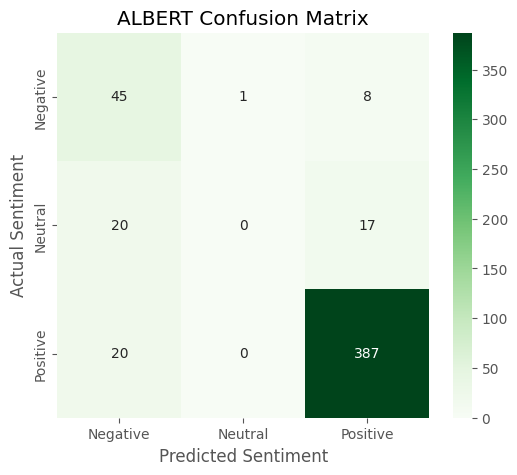

In [68]:
#3️⃣ Confusion Matrix for ALBERT

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
albert_conf_matrix = confusion_matrix(y_true, y_pred_albert)

# Define labels
labels = ['Negative', 'Neutral', 'Positive']

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(albert_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("ALBERT Confusion Matrix")
plt.show()

# **EXTRA**

> Add blockquote



🔹 Skewness of Score: -1.7442
🔹 Kurtosis of Score: 1.8565
📌 The Score distribution is negatively skewed (left-skewed).
📌 The Score distribution has low kurtosis (platykurtic) with light tails.




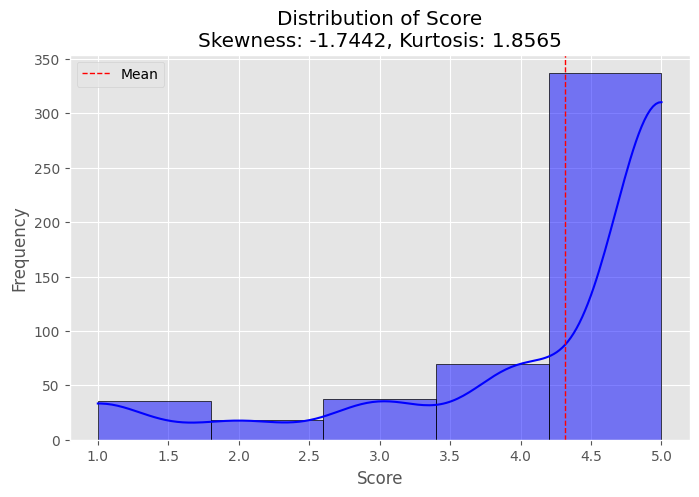

In [69]:
# 🧩 Skewness and Kurtosis

import scipy.stats as stats

# Assuming results_df is already loaded
# Calculate skewness and kurtosis for the 'Score' column
score_skewness = results_df['Score'].skew()
score_kurtosis = results_df['Score'].kurtosis()

# Print results
print(f"🔹 Skewness of Score: {score_skewness:.4f}")
print(f"🔹 Kurtosis of Score: {score_kurtosis:.4f}")

# Interpretation
if score_skewness > 0:
    print("📌 The Score distribution is positively skewed (right-skewed).")
elif score_skewness < 0:
    print("📌 The Score distribution is negatively skewed (left-skewed).")
else:
    print("📌 The Score distribution is symmetric.")

if score_kurtosis > 3:
    print("📌 The Score distribution has high kurtosis (leptokurtic) with heavy tails.")
elif score_kurtosis < 3:
    print("📌 The Score distribution has low kurtosis (platykurtic) with light tails.")
else:
    print("📌 The Score distribution is mesokurtic (normal-like).")


print()
print()


# Plot histogram and KDE
plt.figure(figsize=(8, 5))
sns.histplot(results_df['Score'], bins=5, kde=True, color="blue", edgecolor="black")

# Add vertical mean line
plt.axvline(results_df['Score'].mean(), color='red', linestyle='dashed', linewidth=1, label="Mean")

# Title and labels
plt.title(f"Distribution of Score\nSkewness: {score_skewness:.4f}, Kurtosis: {score_kurtosis:.4f}")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

# Show plot
plt.show()


# **Interpretation**
***1. Skewness (-1.74): Strong Left Skew***

Meaning: Most ratings are high (4–5), with very few low (1–2).

Real-world example:

"Product with mostly 5-star reviews and a handful of 1-star complaints."

"Employee performance ratings where most get high marks (lenient grading)."

***2. Kurtosis (1.86): Platykurtic***

Meaning: The distribution is flatter than normal (fewer extreme values than expected).

Why?:

Scores are spread out (not clustered sharply around the mean).

Could indicate:

Forced distribution (e.g., managers told to avoid extremes).

Middle-score bias (people avoiding 1s and 5s).

**Visual Clues from the Plot**

***Left-Skewed:***

Tall bars on the right (4–5).

Short/absent bars on the left (1–2).

***Platykurtic:***

Flat peak (no sharp clustering around 3 or 4).

Thin tails (few 1s or 5s).

**Practical Implications**

Potential Bias: Ratings may be inflated (high scores dominate).

Limited Discrimination: Flatness suggests ratings don’t differentiate well (e.g., everyone gets a 4).

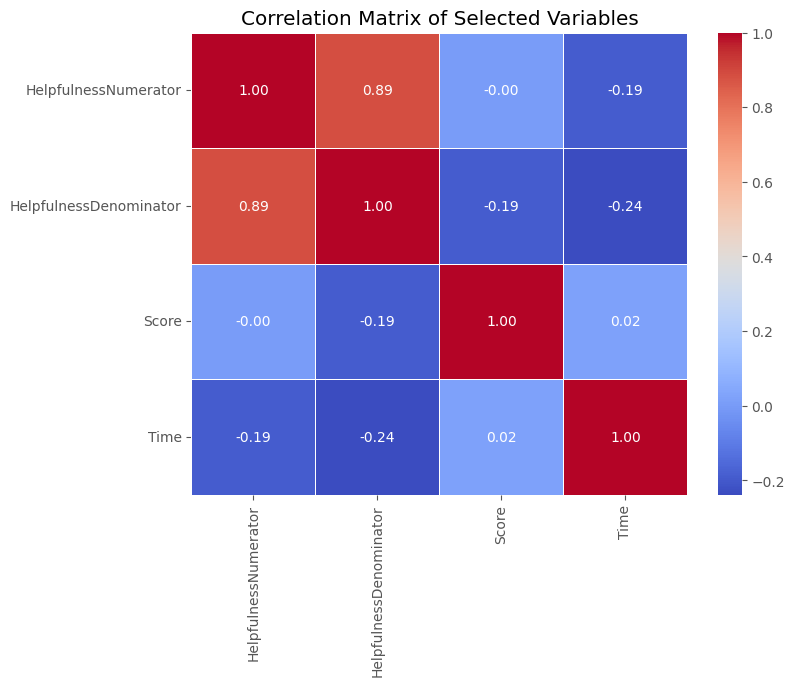

In [70]:
# 🧩 Correlation Analysis

# Select relevant numeric columns for correlation analysis
correlation_columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']

# Compute correlation matrix
corr_matrix = results_df[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title and labels
plt.title("Correlation Matrix of Selected Variables")
plt.show()

**Key Findings**

***HelpfulnessNumerator vs. HelpfulnessDenominator (0.89)***

Very strong positive correlation:

Votes marked "helpful" (Numerator) almost always come from total votes (Denominator).

Practical Implication: These variables likely measure the same underlying behavior. Consider combining them (e.g., HelpfulnessRatio = Numerator/Denominator).

***Score vs. Helpfulness (-0.00 to -0.19)***

Near-zero correlation:

Product ratings (Score) are unrelated to how helpful reviews are perceived.

Insight: High/low ratings don’t predict review usefulness. A 1-star review can be just as helpful as a 5-star review.

***Time vs. Helpfulness (-0.19 to -0.24)***

Weak negative correlation:

Newer reviews (Time) are slightly less likely to be marked helpful.

Possible Reason: Older reviews had more time to accumulate helpful votes.

***Score vs. Time (0.02)***

No correlation:

Ratings don’t trend over time (e.g., no evidence of score inflation/deflation).